In [1]:
import numpy as np;
import pandas as pd;

In [2]:
data=pd.read_csv('data.csv')     #read the data.csv file

In [3]:
data_future=pd.read_csv('futures.csv')  #read the future.csv.file

In [4]:
import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split # to split the data
from sklearn.cross_validation import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')

C:\Users\ranra\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40181 entries, 0 to 40180
Data columns (total 16 columns):
age               40181 non-null int64
job               40181 non-null object
marital           40181 non-null object
education         40181 non-null object
default           40181 non-null object
housing           40181 non-null object
loan              40181 non-null object
contact           40181 non-null object
day_of_week       40181 non-null object
campaign          40181 non-null int64
pdays             40181 non-null int64
poutcome          40181 non-null object
cons_price_idx    40181 non-null float64
cons_conf_idx     40181 non-null float64
prime_rate        40181 non-null float64
y                 40181 non-null object
dtypes: float64(3), int64(3), object(10)
memory usage: 4.9+ MB


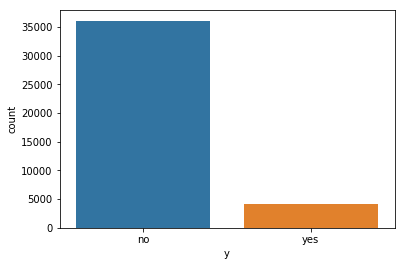

In [6]:
sns.countplot("y",data=data) # check the y distributions

# Transform categorical data to numerical data

In [7]:
# define a class to transform categorical data to numerical data from 0..n
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [8]:
data=MultiColumnLabelEncoder(columns = ['job','marital','education','default','housing','loan','contact','day_of_week','poutcome','y']).fit_transform(data)

In [9]:
data_future=MultiColumnLabelEncoder(columns = ['job','marital','education','default','housing','loan','contact','day_of_week','poutcome']).fit_transform(data_future)

In [10]:
data.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate,y
0,56,3,1,0,0,0,0,1,1,1,999,1,93.994,-36.4,4.857,0
1,57,7,1,3,1,0,0,1,1,1,999,1,93.994,-36.4,4.857,0
2,37,7,1,3,0,2,0,1,1,1,999,1,93.994,-36.4,4.857,0
3,40,0,1,1,0,0,0,1,1,1,999,1,93.994,-36.4,4.857,0
4,56,7,1,3,0,0,2,1,1,1,999,1,93.994,-36.4,4.857,0


In [11]:
data_future.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate
0,42,1,1,2,1,0,0,1,1,1,999,1,93.994,-36.4,4.857
1,41,4,1,1,0,0,0,1,1,2,999,1,93.994,-36.4,4.857
2,34,9,1,3,0,0,0,1,1,1,999,1,93.994,-36.4,4.857
3,54,5,1,3,1,0,0,1,1,1,999,1,93.994,-36.4,4.857
4,48,1,1,0,0,2,0,1,1,1,999,1,93.994,-36.4,4.857


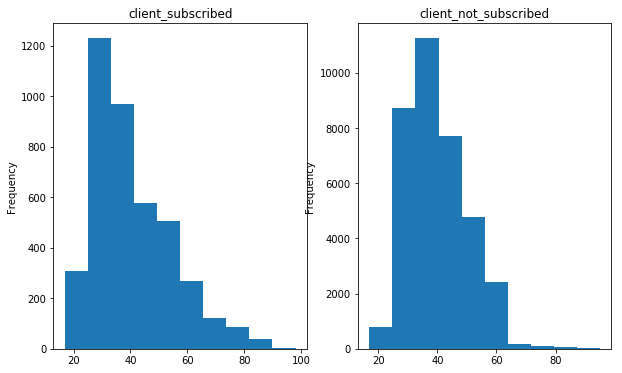

In [12]:
# look at the difference in distributions between 0 and 1
client_subscribed = data[data["y"]==1]
client_not_subscribed = data[data["y"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
client_subscribed.age.plot.hist(title="client_subscribed")
plt.subplot(122)
client_not_subscribed.age.plot.hist(title="client_not_subscribed")

In [85]:
# check in the number of Percentage
Count_no = len(data[data["y"]==0]) # not subscribed by 0
Count_yes = len(data[data["y"]==1]) # yes by 1
Percentage_of_no = Count_no/(Count_no+Count_yes)
print("percentage of no",Percentage_of_no*100)
Percentage_of_yes= Count_yes/(Count_no+Count_yes)
print("percentage of yes",Percentage_of_yes*100)

percentage of no 89.75635250491526
percentage of yes 10.243647495084742


# Handle imblanced data

In [15]:
from sklearn.utils import resample

In [16]:
data_majority=data[data.y==0]
data_minority=data[data.y==1]

In [17]:
# resample the minority of data up to same amounts with majority(duplicate randomly from existed data)
data_minority_upsampled = resample(data_minority,replace=True,n_samples=36065,random_state=123)

In [18]:
# data_upsampled is the balanced data
data_upsampled = pd.concat([data_majority,data_minority_upsampled])

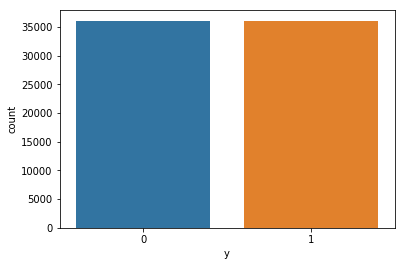

In [19]:
sns.countplot("y",data=data_upsampled)

# Standardize data

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
scaler.fit(data_upsampled.drop('y',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
scaled_features = scaler.transform(data_upsampled.drop('y',axis=1))

In [24]:
scaled_data=pd.DataFrame(scaled_features,columns=data_upsampled.columns[:-1])

In [25]:
scaled_data.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate
0,1.295145,-0.230426,-0.331518,-1.824056,-0.436215,-1.106064,-0.448175,1.609177,-0.743612,-0.56567,0.354655,0.032781,0.815485,0.705839,1.002379
1,1.378211,0.876473,-0.331518,-0.420612,2.291028,-1.106064,-0.448175,1.609177,-0.743612,-0.56567,0.354655,0.032781,0.815485,0.705839,1.002379
2,-0.283114,0.876473,-0.331518,-0.420612,-0.436215,0.926014,-0.448175,1.609177,-0.743612,-0.56567,0.354655,0.032781,0.815485,0.705839,1.002379
3,-0.033915,-1.060600,-0.331518,-1.356241,-0.436215,-1.106064,-0.448175,1.609177,-0.743612,-0.56567,0.354655,0.032781,0.815485,0.705839,1.002379
4,1.295145,0.876473,-0.331518,-0.420612,-0.436215,-1.106064,2.332509,1.609177,-0.743612,-0.56567,0.354655,0.032781,0.815485,0.705839,1.002379


# LogisticRegression

In [26]:
x=data_upsampled[['age','job','marital','education','default','housing','loan','contact','day_of_week','campaign','pdays','poutcome','cons_price_idx','cons_conf_idx','prime_rate']]
y=data_upsampled['y']
x_future=data_future[['age','job','marital','education','default','housing','loan','contact','day_of_week','campaign','pdays','poutcome','cons_price_idx','cons_conf_idx','prime_rate']]

In [106]:
# used for making comparsion with balanced data
x1=data[['age','job','marital','education','default','housing','loan','contact','day_of_week','campaign','pdays','poutcome','cons_price_idx','cons_conf_idx','prime_rate']]
y1=data['y']

In [107]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.20,random_state=101)

In [108]:
logmodel = LogisticRegression()
logmodel.fit(x1_train,y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
# imbalanced data doing classification
predictions1=logmodel.predict(x1_test)
print(classification_report(y1_test,predictions1))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      7211
          1       0.63      0.19      0.29       826

avg / total       0.88      0.91      0.88      8037



In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=101)

In [28]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
from sklearn.metrics import classification_report

In [31]:
predictions=logmodel.predict(x_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.72      0.75      0.73      7245
          1       0.74      0.70      0.72      7181

avg / total       0.73      0.73      0.72     14426



# KNearesetNeighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
x=scaled_data[['age','job','marital','education','default','housing','loan','contact','day_of_week','campaign','pdays','poutcome','cons_price_idx','cons_conf_idx','prime_rate']]
y=data_upsampled['y']

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(scaled_data,data_upsampled['y'], test_size=0.20,random_state=101)

In [36]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [37]:
pred = knn.predict(x_test)

In [38]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.99      0.91      0.94      7245
          1       0.91      0.99      0.95      7181

avg / total       0.95      0.95      0.95     14426



# Decision Tree and Random Forest

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
edtree=DecisionTreeClassifier(criterion='entropy')

In [41]:
x=data_upsampled[['age','job','marital','education','default','housing','loan','contact','day_of_week','campaign','pdays','poutcome','cons_price_idx','cons_conf_idx','prime_rate']]
y=data_upsampled['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=101)

In [42]:
edtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
predictions = edtree.predict(x_test)

In [44]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      0.89      0.94      7245
          1       0.90      1.00      0.95      7181

avg / total       0.95      0.94      0.94     14426



In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier(n_estimators=100)

In [47]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
rfc_pred = rfc.predict(x_test)

In [49]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97      7245
          1       0.94      1.00      0.97      7181

avg / total       0.97      0.97      0.97     14426



# SupportVectorMachine

In [50]:
from sklearn.svm import SVC

In [51]:
model = SVC()

In [52]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
predictions = model.predict(x_test)

In [54]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      0.86      0.85      7245
          1       0.85      0.83      0.84      7181

avg / total       0.84      0.84      0.84     14426



In [55]:
param_grid = {'C': [0.1,1, 10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [56]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9563815960488693, total= 2.1min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9559656875487392, total= 2.1min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.3min remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.907663512529895, total= 2.1min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7444762152326488, total= 2.3min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7467117234208475, total= 2.3min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.74669855464282, total= 2.3min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7363140109175982, total= 1.5min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7362100337925657, total= 1.5min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7342206509306437, total= 1.5min
[CV] C=0.1, gamma=0.001, kernel=rbf ........

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7269560696646737, total= 1.7min
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7151398565041073, total= 1.8min
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9877306992461659, total= 3.3min
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9880946191837796, total= 3.4min
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9879380264115628, total= 3.3min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.9310631661034572, total= 7.6min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.9313231089160384, total= 7.7min
[CV] C=1000, gamma=0.1, kernel=rbf ..

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 444.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [57]:
grid_predictions = grid.predict(x_test)

In [58]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      7245
          1       0.99      1.00      0.99      7181

avg / total       0.99      0.99      0.99     14426



# NeuralNetwork

In [59]:
x=scaled_data[['age','job','marital','education','default','housing','loan','contact','day_of_week','campaign','pdays','poutcome','cons_price_idx','cons_conf_idx','prime_rate']]
y=data_upsampled['y']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [61]:
x_train.shape

(57704, 15)

In [62]:
x_test.shape

(14426, 15)

In [63]:
import tensorflow
from tensorflow.contrib.keras import models, layers

In [64]:
dnn = models.Sequential()
dnn.add( layers.Dense(input_dim=15, units=8, activation='relu' ))
dnn.add( layers.Dense(units=8, activation='relu' ))
dnn.add( layers.Dense(units=8, activation='relu' ))
dnn.add( layers.Dense(units=1, activation='sigmoid' ))

In [65]:
dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
dnn.fit(x_train, y_train, epochs=500, batch_size=100)

Epoch 1/500
57704/57704 [==============================] - 1s 18us/step - loss: 0.5984 - acc: 0.6756
Epoch 2/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5511 - acc: 0.7314
Epoch 3/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5448 - acc: 0.7344
Epoch 4/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5410 - acc: 0.7365
Epoch 5/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5390 - acc: 0.7381
Epoch 6/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5379 - acc: 0.7384
Epoch 7/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5370 - acc: 0.7385
Epoch 8/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5364 - acc: 0.7379
Epoch 9/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5361 - acc: 0.7380
Epoch 10/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5355 - a

57704/57704 [==============================] - 1s 10us/step - loss: 0.5164 - acc: 0.7521
Epoch 161/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5165 - acc: 0.7539
Epoch 162/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5165 - acc: 0.7532
Epoch 163/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5165 - acc: 0.7521
Epoch 164/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5165 - acc: 0.7531
Epoch 165/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5164 - acc: 0.7536
Epoch 166/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5163 - acc: 0.7533
Epoch 167/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5163 - acc: 0.7535
Epoch 168/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5163 - acc: 0.7530
Epoch 169/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.516

57704/57704 [==============================] - 1s 10us/step - loss: 0.5138 - acc: 0.7564
Epoch 319/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5137 - acc: 0.7570
Epoch 320/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5135 - acc: 0.7566
Epoch 321/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5135 - acc: 0.7564
Epoch 322/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5137 - acc: 0.7564
Epoch 323/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5135 - acc: 0.7570
Epoch 324/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5143 - acc: 0.7570
Epoch 325/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5139 - acc: 0.7567
Epoch 326/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5136 - acc: 0.7569
Epoch 327/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.513

57704/57704 [==============================] - 1s 10us/step - loss: 0.5114 - acc: 0.7600
Epoch 477/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5115 - acc: 0.7585
Epoch 478/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5112 - acc: 0.7589
Epoch 479/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5112 - acc: 0.7597
Epoch 480/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5113 - acc: 0.7588
Epoch 481/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5111 - acc: 0.7595
Epoch 482/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5111 - acc: 0.7598
Epoch 483/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5111 - acc: 0.7594
Epoch 484/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.5113 - acc: 0.7594
Epoch 485/500
57704/57704 [==============================] - 1s 10us/step - loss: 0.511

In [67]:
predictions = dnn.predict_classes(x_test)

In [68]:
print(classification_report(predictions,y_test))

             precision    recall  f1-score   support

          0       0.83      0.72      0.78      8340
          1       0.68      0.80      0.74      6086

avg / total       0.77      0.76      0.76     14426



# Output Future Prediction

In [69]:
data_output=pd.read_csv('futures.csv')

In [72]:
data_output.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate
0,42,blue-collar,married,basic.9y,unknown,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857
1,41,management,married,basic.6y,no,no,no,telephone,mon,2,999,nonexistent,93.994,-36.4,4.857
2,34,technician,married,high.school,no,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857
3,54,retired,married,high.school,unknown,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857
4,48,blue-collar,married,basic.4y,no,yes,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857


In [94]:
# use the best model to predict the future data(GridSearch SVM)
future_pred=grid.predict(x_future)

In [95]:
data_output['y']=future_pred

In [96]:
data_output['y'].replace(0,'no',inplace=True)

In [97]:
data_output['y'].replace(1,'yes',inplace=True)

In [98]:
data_output.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate,y
0,42,blue-collar,married,basic.9y,unknown,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
1,41,management,married,basic.6y,no,no,no,telephone,mon,2,999,nonexistent,93.994,-36.4,4.857,no
2,34,technician,married,high.school,no,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
3,54,retired,married,high.school,unknown,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
4,48,blue-collar,married,basic.4y,no,yes,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no


In [115]:
# output the future data with predciation in future_with_prediction.csv
data_output.to_csv('futures.csv',index=False)

In [116]:
# test for read the future_with_prediction.csv
test=pd.read_csv('futures.csv')

In [117]:
test.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate,y
0,42,blue-collar,married,basic.9y,unknown,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
1,41,management,married,basic.6y,no,no,no,telephone,mon,2,999,nonexistent,93.994,-36.4,4.857,no
2,34,technician,married,high.school,no,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
3,54,retired,married,high.school,unknown,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
4,48,blue-collar,married,basic.4y,no,yes,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
